# Multiple Linear Regression
Multiple Linear Regression (MLR) is a statistical technique that models the relationship between a dependent variable and multiple independent variables. This method helps in understanding how the dependent variable changes when any one of the independent variables is varied, while the other independent variables are held fixed.

### Import Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Analysis

In [101]:
df = pd.read_csv('../data/Companies_R&D_expense.csv')
df.head()

,Training Expense,Innovation Lab Expense,Reward Expense,Profit
0,63408.86,129219.61,46085.25,97427.84
1,55493.95,103057.49,214634.81,96778.92
2,46426.07,157693.92,210797.67,96712.80
3,46014.02,85047.44,205517.64,96479.51
4,28663.76,127056.21,201126.82,90708.19


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Training Expense        50 non-null     float64
 1   Innovation Lab Expense  50 non-null     float64
 2   Reward Expense          50 non-null     float64
 3   Profit                  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [103]:
df.describe()

,Training Expense,Innovation Lab Expense,Reward Expense,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [104]:
df[df.values == 0]

,Training Expense,Innovation Lab Expense,Reward Expense,Profit
15,0.00,135426.92,0.00,42559.73
15,0.00,135426.92,0.00,42559.73
16,542.05,51743.15,0.00,35673.41
17,0.00,116983.80,45173.06,14681.40
37,86419.70,153514.11,0.00,122776.86


### Data Manipulation
#### Re-assigning Zero Values

In [105]:
# TRAINING EXPENSE
df.loc[df['Training Expense'] == 0, 'Training Expense'] = df['Training Expense'].median()

# REWARD EXPENSE
df.loc[df['Reward Expense'] == 0, 'Reward Expense'] = df['Reward Expense'].median()

### Assigning the Features and Target

In [119]:
# FEATURES
x = df.iloc[:,:-1]
x[:5]

,Training Expense,Innovation Lab Expense,Reward Expense
0,63408.86,129219.61,46085.25
1,55493.95,103057.49,214634.81
2,46426.07,157693.92,210797.67
3,46014.02,85047.44,205517.64
4,28663.76,127056.21,201126.82


In [107]:
# TARGET
y = df.iloc[:,-1]
y[:5]

0    97427.84
1    96778.92
2    96712.80
3    96479.51
4    90708.19
Name: Profit, dtype: float64

### Split the Data into 2 parts: TRAINING DATA and TEST DATA

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Data Visualization

### Training Expense

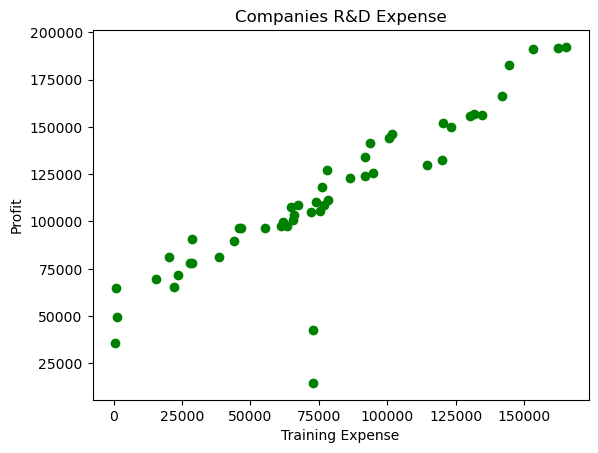

In [125]:
plt.title('Companies R&D Expense')
plt.xlabel('Training Expense')
plt.ylabel('Profit')
plt.scatter(x['Training Expense'], y, color='green', label='Training')
plt.show()

### Reward Expense

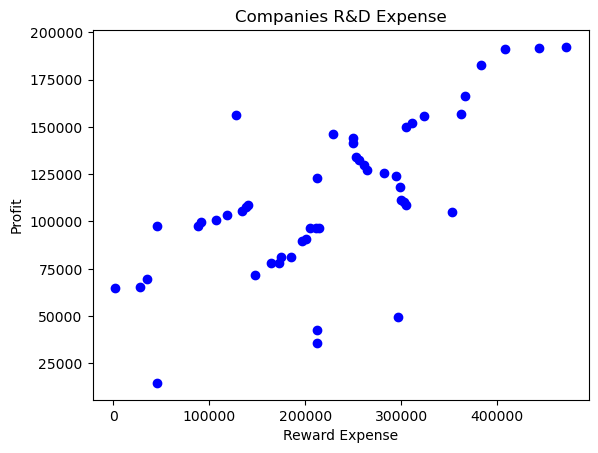

In [129]:
plt.title('Companies R&D Expense')
plt.xlabel('Reward Expense')
plt.ylabel('Profit')
plt.scatter(x['Reward Expense'], y, color='blue', label='Reward')
plt.show()

### Innovation Lab Expense

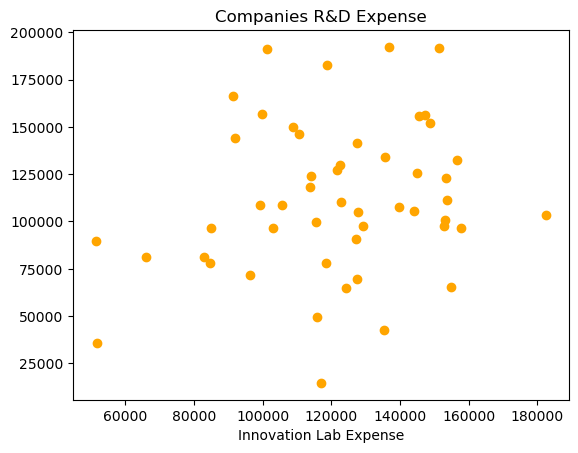

In [130]:
plt.title('Companies R&D Expense')
plt.xlabel('Innovation Lab Expense')
plt.scatter(x['Innovation Lab Expense'], y, color='orange', label='Innovation')
plt.show()

### All Features in 1 Graph

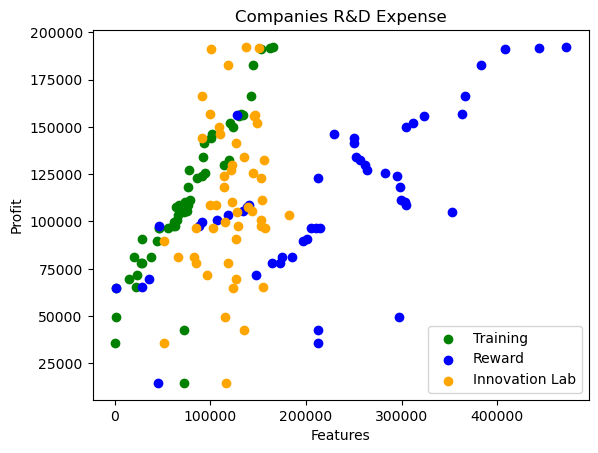

In [123]:
plt.title('Companies R&D Expense')
plt.xlabel('Features')
plt.ylabel('Profit')
plt.scatter(x['Training Expense'], y, color='green', label='Training')
plt.scatter(x['Reward Expense'], y, color='blue', label='Reward')
plt.scatter(x['Innovation Lab Expense'], y, color='orange', label='Innovation Lab')
plt.legend()
plt.show()